In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Loading the dataset
df = pd.read_excel("ECOMM DATA.xlsx")
#Understanding the dataset
print(df.head())
print(df.info())
print("Datset has following columns",df.columns)
print("The datset has following rows and columns:\n",df.shape)


   Row ID         Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1   26341    IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
2   25330    IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
3   13524  ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
4   47221     SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology  Accessories

In [ ]:
#DATA CLEANING
print("Number of NULL values in each column",df.isnull().sum())
#postal code column has lot of NULL values so we will remove it because it it have negative impact on our analysis
print(df['Postal Code'].drop(index = 1,inplace=True))
print(df.head(2))
print(df.duplicated().sum())
#There are no duplicate values in the dataset

Number of NULL values in each column Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64
None
   Row ID        Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0   32298  CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1   26341   IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   

   Customer Name    Segment           City            State  ...  \
0    Rick Hansen   Consumer  New York City         New York  ...   
1

In [ ]:
print('Descriptive satatistics for the E-Commerce Datsaset:\n',df[['Sales','Quantity','Discount','Profit','Shipping Cost']].describe())


Descriptive satatistics for the E-Commerce Datsaset:
               Sales      Quantity      Discount        Profit  Shipping Cost
count  51290.000000  51290.000000  51290.000000  51290.000000   51290.000000
mean     246.490581      3.476545      0.142908     28.610982      26.375818
std      487.565361      2.278766      0.212280    174.340972      57.296810
min        0.444000      1.000000      0.000000  -6599.978000       0.002000
25%       30.758625      2.000000      0.000000      0.000000       2.610000
50%       85.053000      3.000000      0.000000      9.240000       7.790000
75%      251.053200      5.000000      0.200000     36.810000      24.450000
max    22638.480000     14.000000      0.850000   8399.976000     933.570000


          Category         Sales
2       Technology  4.744557e+06
0        Furniture  4.110874e+06
1  Office Supplies  3.787070e+06


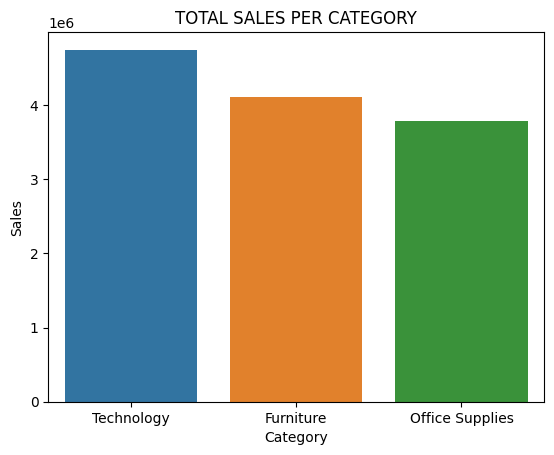

In [ ]:
sales_per_category = df.groupby(['Category'],as_index= False)['Sales'].sum().sort_values(by='Sales',ascending = False)
print(sales_per_category)
sns.barplot(x='Category',y = 'Sales',data = sales_per_category,hue='Category')
plt.title("TOTAL SALES PER CATEGORY")
plt.show()

   Sub-Category  Quantity
16       Tables      3083
15     Supplies      8543
14      Storage     16917
13       Phones     11870
12        Paper     12822
11     Machines      4906
10       Labels      9322
9   Furnishings     11225
8     Fasteners      8390
7     Envelopes      8380
6       Copiers      7454
5        Chairs     12336
4     Bookcases      8310
3       Binders     21429
2           Art     16301
1    Appliances      6078
0   Accessories     10946


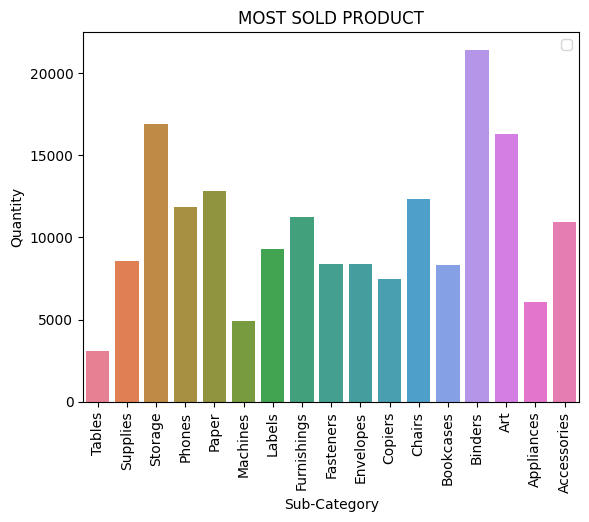

In [ ]:
most_sold_product = df.groupby(['Sub-Category'],as_index = False)['Quantity'].sum().sort_values(by = 'Sub-Category',ascending = False)
print(most_sold_product)
plt.xticks(rotation = 90)
sns.barplot(x='Sub-Category', y='Quantity', data=most_sold_product, hue='Sub-Category')
plt.title('MOST SOLD PRODUCT')
plt.legend()
plt.show()

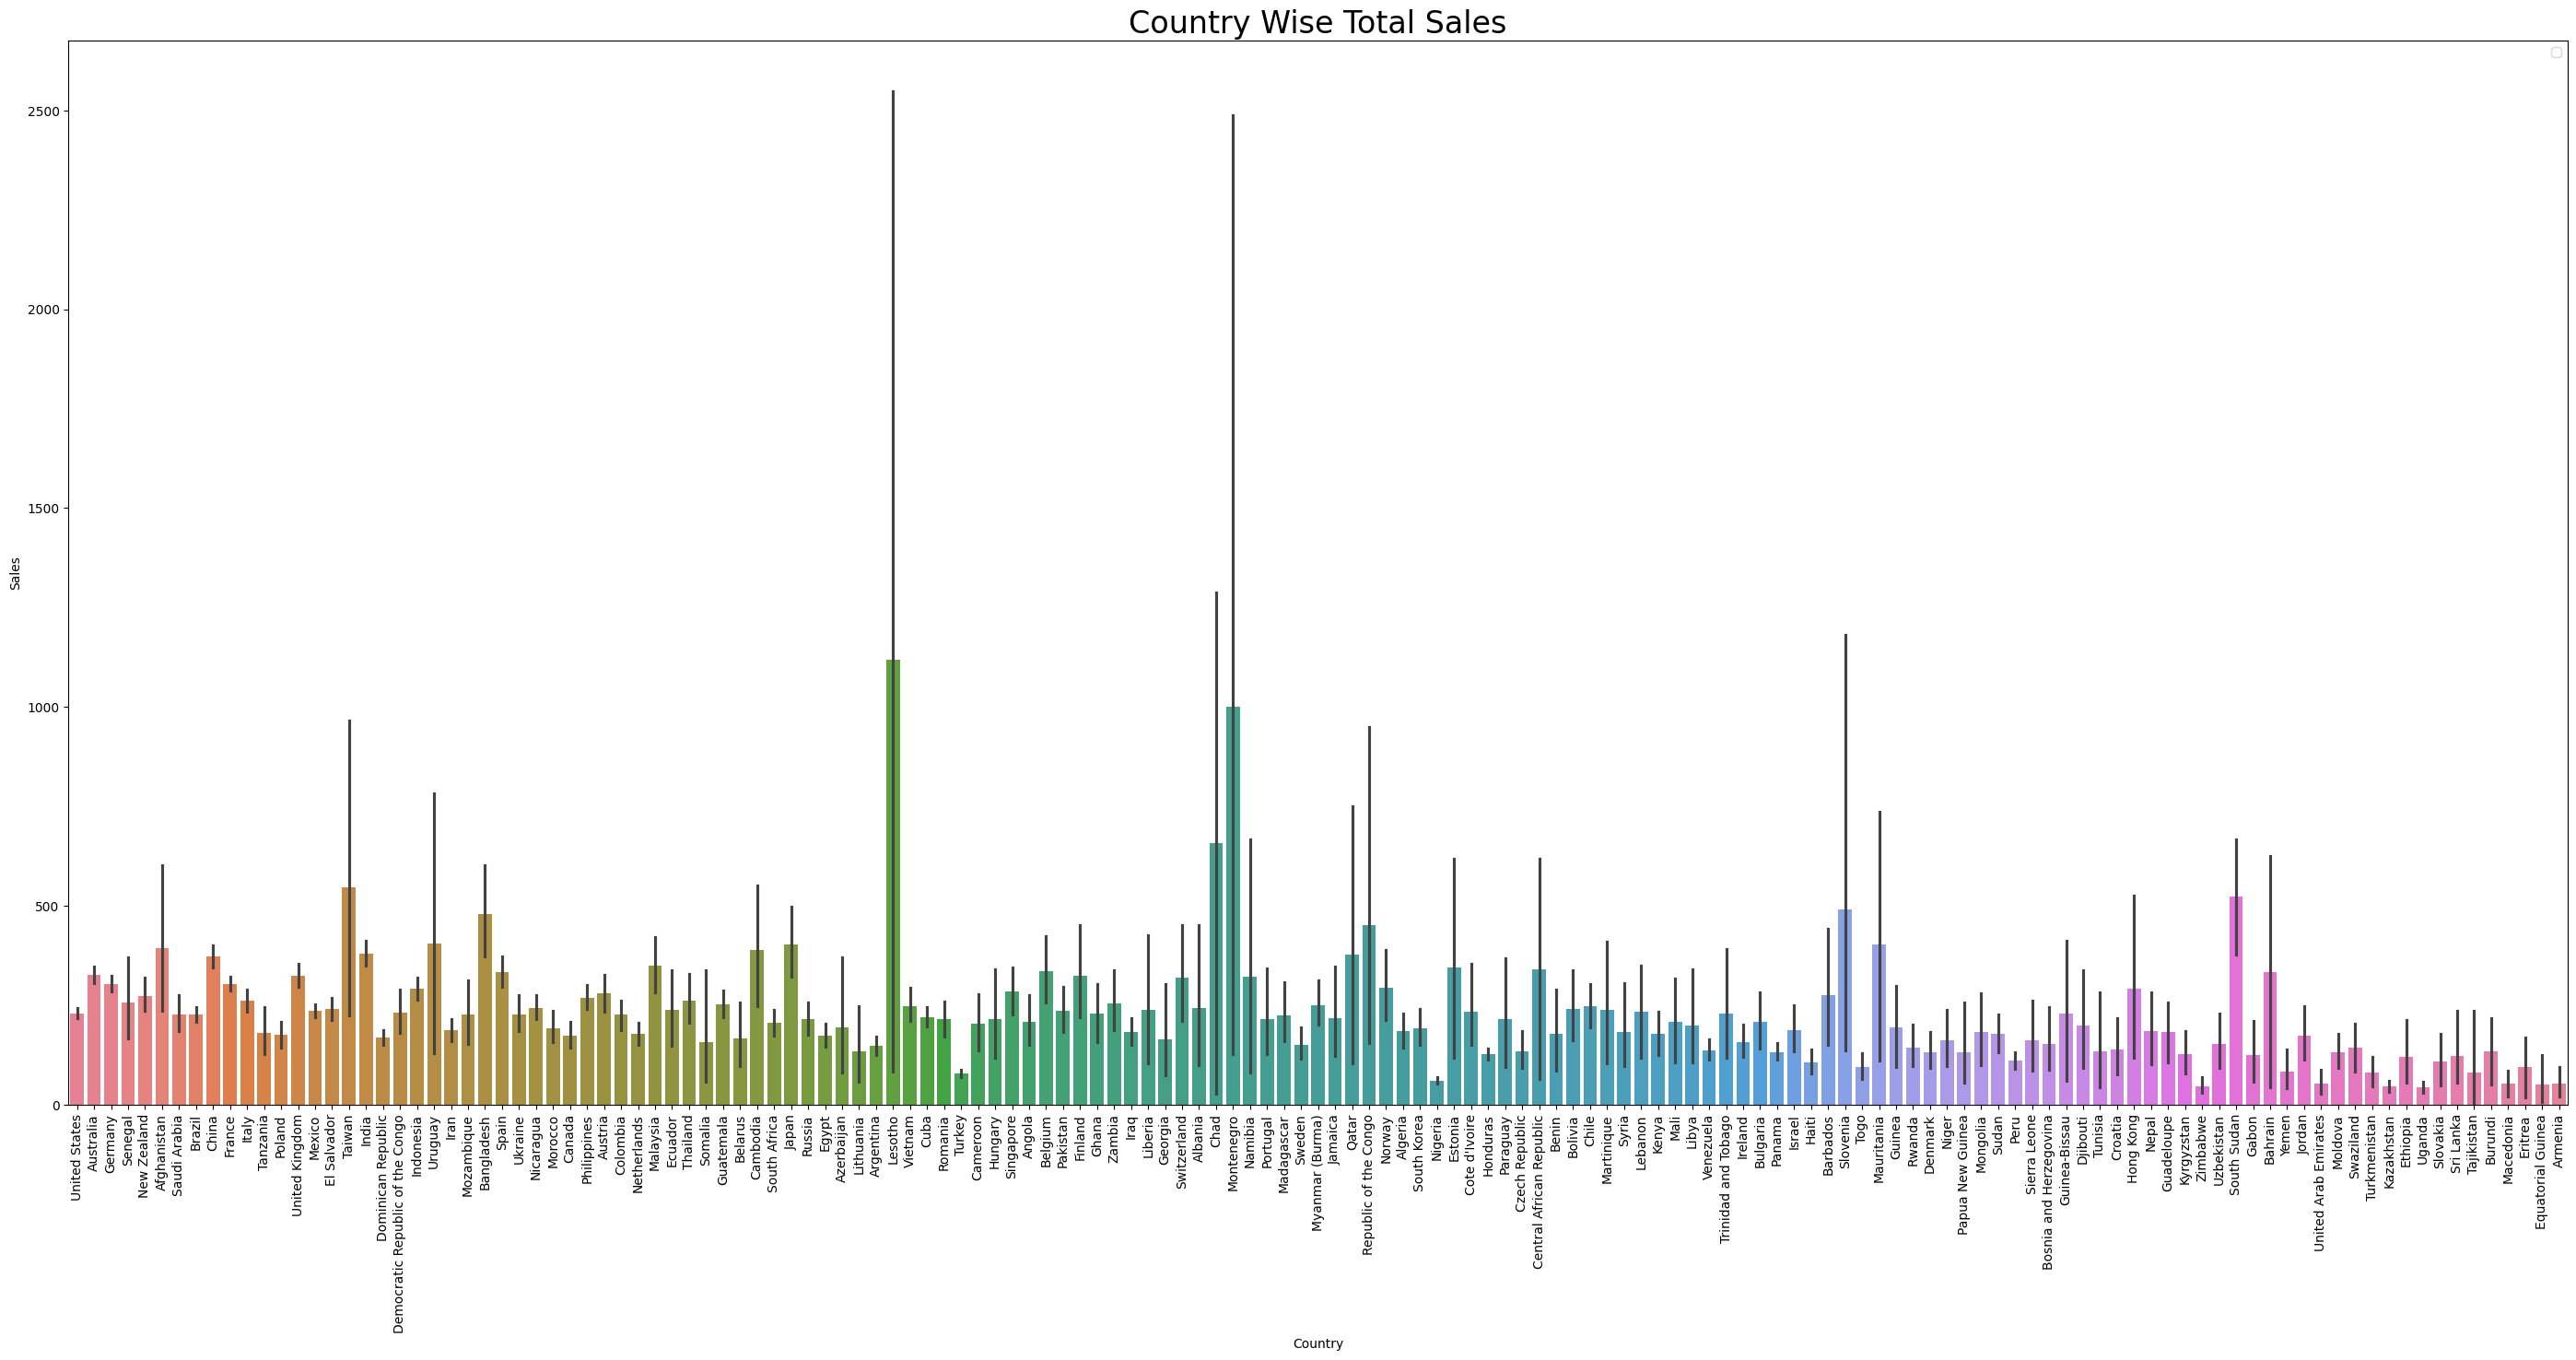

In [ ]:
country_wise_sales = df.groupby(['Country'],as_index = False)['Sales'].sum().sort_values(by = 'Sales',ascending=False)
plt.figure(figsize=(35, 15))
plt.xticks(rotation = 90)
sns.barplot(x ='Country',y ='Sales',data = df,hue='Country')
plt.title("Country Wise Total Sales",fontsize=24)
plt.legend()
plt.show()

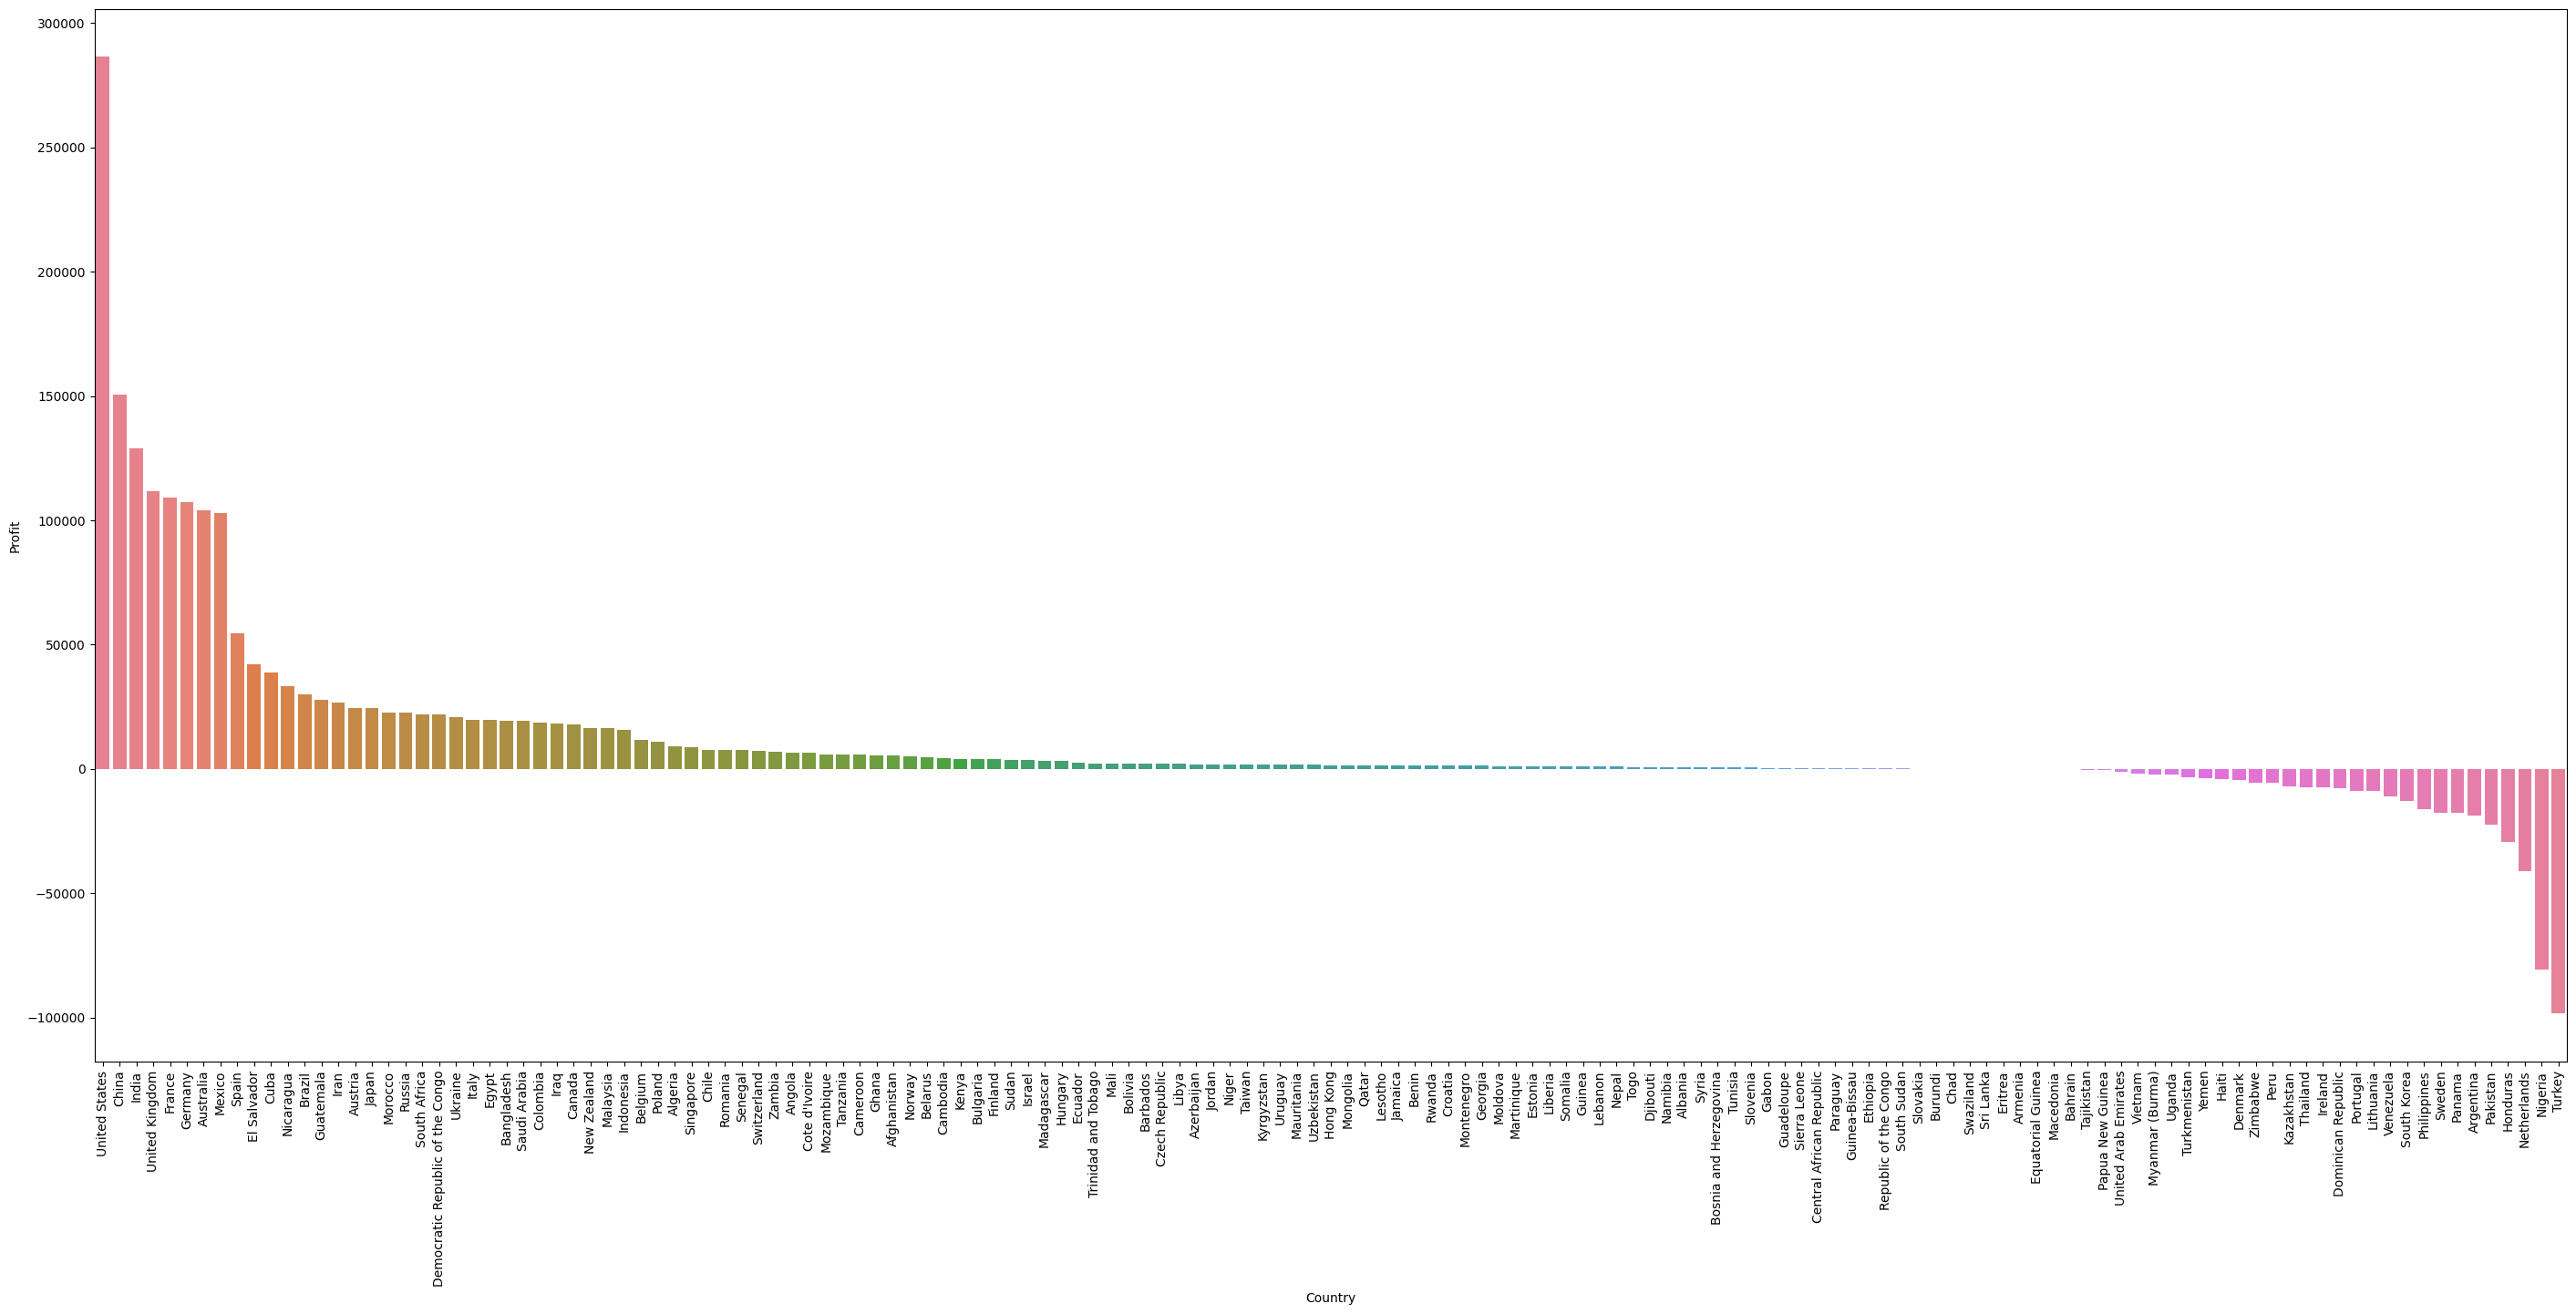

In [ ]:
Country_wise_profit = df.groupby(['Country'],as_index = False)['Profit'].sum().sort_values(by = 'Profit',ascending = False)
plt.figure(figsize=(35, 15))
plt.xticks(rotation = 90)
sns.barplot(x = 'Country',y = 'Profit',data = Country_wise_profit,hue='Country' )
plt
plt.show()

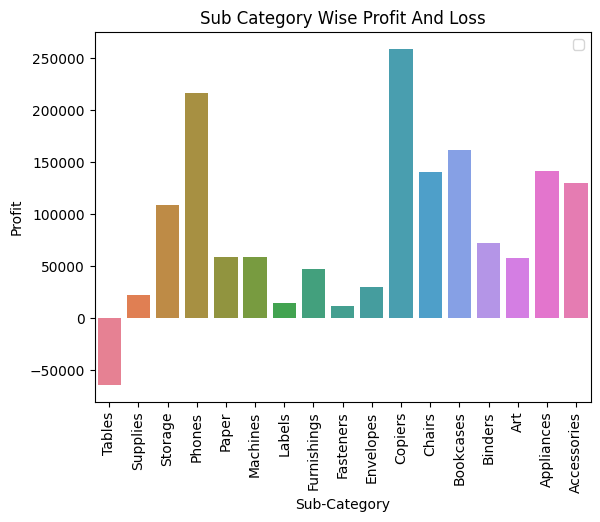

In [ ]:
sub_category_wise_profit = df.groupby(['Sub-Category'],as_index = False)['Profit'].sum().sort_values(by='Sub-Category',ascending = False)
plt.xticks(rotation = 90)
sns.barplot(x = 'Sub-Category' , y = 'Profit',data = sub_category_wise_profit,hue='Sub-Category')
plt.title("Sub Category Wise Profit And Loss")
plt.legend()
plt.show()

          Category        Profit
2       Technology  663778.73318
1  Office Supplies  518473.83430
0        Furniture  285204.72380


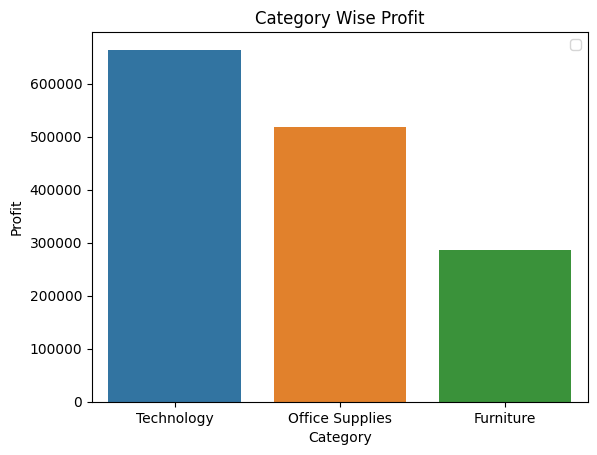

In [ ]:
category_wise_profit = df.groupby(['Category'],as_index = False)['Profit'].sum().sort_values(by='Category',ascending = False)
print(category_wise_profit)
sns.barplot(x = 'Category' , y = 'Profit',data = category_wise_profit,hue='Category')
plt.title("Category Wise Profit")
plt.legend()
plt.show()

Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64


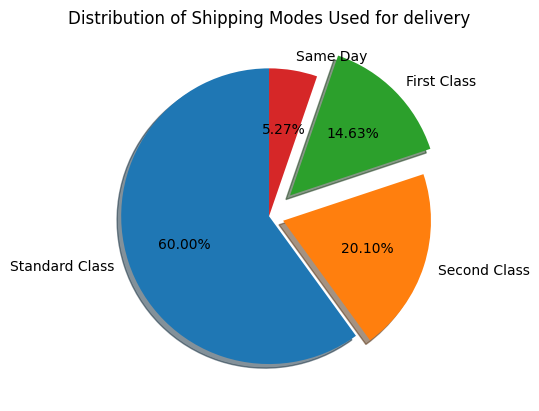

In [ ]:
shipping = df['Ship Mode'].value_counts()
print(shipping)
plt.pie(shipping,labels =shipping.index,explode=[0,0.1,0.2,0],autopct='%1.2f%%',shadow={'ox': -0.04, 'edgecolor': 'black', 'shade': 0.9}, startangle=90)
plt.title('Distribution of Shipping Modes Used for delivery')
plt.show()

   Sub-Category  Shipping Cost
13       Phones    184902.4920
5        Chairs    164229.3520
6       Copiers    159496.2049
4     Bookcases    155481.9670
14      Storage    120546.0320
1    Appliances    108300.5860
0   Accessories     83513.3340
16       Tables     79861.3940
11     Machines     79135.8485
3       Binders     48181.7120
2           Art     41287.1420
9   Furnishings     40746.7660
12        Paper     26660.8450
15     Supplies     24811.5270
7     Envelopes     18547.4880
8     Fasteners      9053.3380
10       Labels      8059.6750


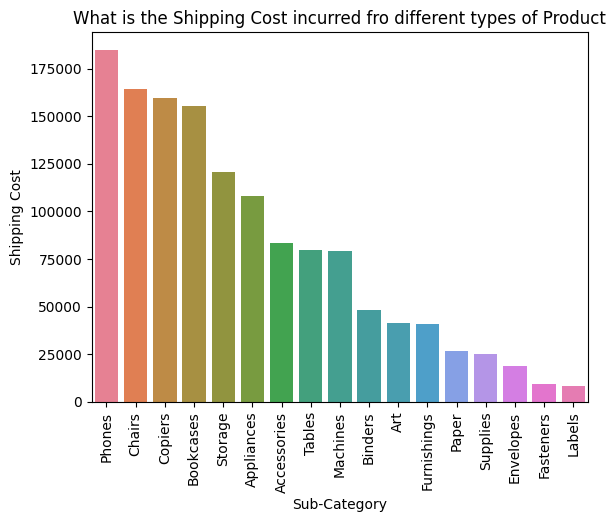

In [ ]:
Shipping_cost = df.groupby(['Sub-Category'],as_index = False)['Shipping Cost'].sum().sort_values(by='Shipping Cost',ascending = False )
print(Shipping_cost)
sns.barplot(x = 'Sub-Category',y='Shipping Cost',data=Shipping_cost,hue='Sub-Category')
plt.title("What is the Shipping Cost incurred fro different types of Product")
plt.xticks(rotation=90)
plt.show()